In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from scipy.linalg import orth, svd
from tensorly.base import unfold
from tensorly.decomposition import tucker

import tensor_utils as utils

np.random.seed(14159)

In [2]:
d = 3
n = np.array([50, 100, 150])
r = np.array([5, 10, 15])
N = np.sum(n)
setting = "$\\mathbf{{n}} = {{{}}}^\\top \\quad \\mathbf{{r}} = {{{}}}^\\top$".format(list(n), list(r))

In [3]:
frobH_r = np.linspace(0, 20, 50)
n_frobH = len(frobH_r)
svals = [np.zeros((n_frobH, r[j])) for j in range(d)]
eigvals = [np.zeros((n_frobH, r[j])) for j in range(d)]
for i, frobH in enumerate(tqdm(frobH_r)):
    H = np.random.randn(*r)
    H = frobH*H/utils.frob(H)
    X = [orth(np.random.randn(n[j], r[j])) for j in range(d)]
    Z = np.random.randn(*n)
    T = utils.tucker_prod(H, X)+Z/np.sqrt(N)
    G, U = tucker(T, r)
    for j in range(d):
        svals[j][i] = svd(U[j].T@X[j], compute_uv=False)
        eigvals[j][i] = svd(unfold(utils.tucker_prod(G, U), j), compute_uv=False)[:r[j]]**2

  0%|          | 0/50 [00:00<?, ?it/s]c:\Users\hug97\anaconda3\lib\site-packages\tensorly\tucker_tensor.py:323: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if rank == 'same':
100%|██████████| 50/50 [14:42<00:00, 17.65s/it]


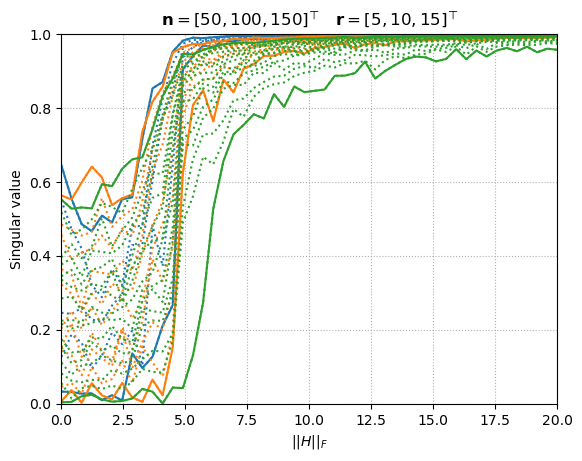

In [4]:
for i in range(d):
    col = 'C'+str(i)
    plt.plot(frobH_r, svals[i], color=col, ls=':')
    plt.plot(frobH_r, svals[i][:, 0], color=col, ls='-')
    plt.plot(frobH_r, svals[i][:, -1], color=col, ls='-')
plt.grid(ls=':')
plt.xlim(frobH_r[0], frobH_r[-1])
plt.ylim(0, 1)
plt.xlabel("$||H||_F$")
plt.ylabel("Singular value")
plt.title(setting);

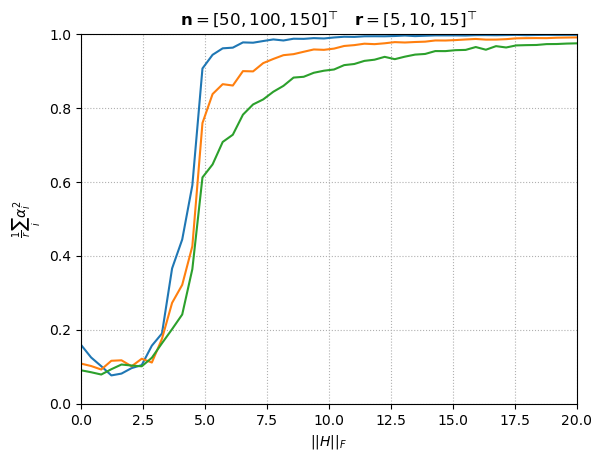

In [5]:
for i in range(d):
    plt.plot(frobH_r, np.sum(svals[i]**2, axis=1)/r[i])
plt.grid(ls=':')
plt.xlim(frobH_r[0], frobH_r[-1])
plt.ylim(0, 1)
plt.xlabel("$||H||_F$")
plt.ylabel("$\\frac{1}{r} \\sum_i \\alpha_i^2$")
plt.title(setting);

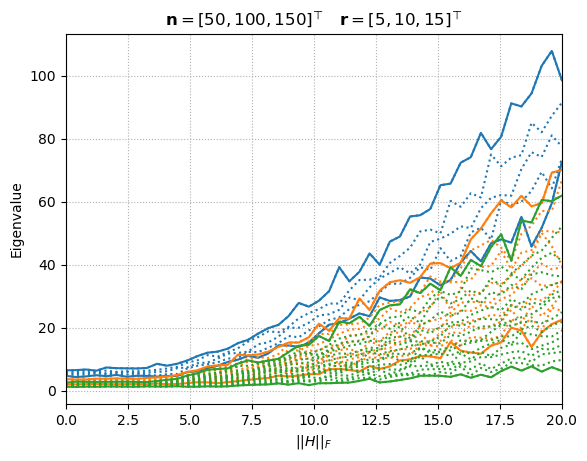

In [6]:
for i in range(d):
    col = 'C'+str(i)
    plt.plot(frobH_r, eigvals[i], color=col, ls=':')
    plt.plot(frobH_r, eigvals[i][:, 0], color=col, ls='-')
    plt.plot(frobH_r, eigvals[i][:, -1], color=col, ls='-')
plt.grid(ls=':')
plt.xlim(frobH_r[0], frobH_r[-1])
plt.xlabel("$||H||_F$")
plt.ylabel("Eigenvalue")
plt.title(setting);